In [1]:
import pandas as pd
import os

In [17]:
import pandas as pd
import os


def process_data_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    return df


data_dir = 'prodata'


data_list = []
for filename in os.listdir(data_dir):
    if filename.endswith('.txt'):  
        file_path = os.path.join(data_dir, filename)
        data = process_data_file(file_path)
        data_list.append(data)


combined_data = pd.concat(data_list, ignore_index=True)


print(combined_data.head())

      Gene                                  WildType.Sequence  \
0      Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1   Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2    Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3  Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4   App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   

                                     Mutant.Sequence  mRNA.Expression.WT.Rep1  \
0  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...             3.183135e+08   
1  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...             1.095715e+03   
2  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...             6.389135e+01   
3  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...             1.629126e+00   
4  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...             3.619328e+00   

   mRNA.Expression.WT.Rep2  mRNA.Expression.WT.Rep3  mRNA.Expression.Mut.Rep1  \
0                26.177081               

In [20]:
print(combined_data.columns)

Index(['Gene', 'WildType.Sequence', 'Mutant.Sequence',
       'mRNA.Expression.WT.Rep1', 'mRNA.Expression.WT.Rep2',
       'mRNA.Expression.WT.Rep3', 'mRNA.Expression.Mut.Rep1',
       'mRNA.Expression.Mut.Rep2', 'mRNA.Expression.Mut.Rep3',
       'Protein.Expression.WT.Rep1', 'Protein.Expression.WT.Rep2',
       'Protein.Expression.WT.Rep3', 'Protein.Expression.Mut.Rep1',
       'Protein.Expression.Mut.Rep2', 'Protein.Expression.Mut.Rep3',
       'CellViability.WT.Rep1', 'CellViability.WT.Rep2',
       'CellViability.WT.Rep3', 'CellViability.Mut.Rep1',
       'CellViability.Mut.Rep2', 'CellViability.Mut.Rep3'],
      dtype='object')


In [21]:
top_genes_table = combined_data[['Gene', 'WildType.Sequence', 'Mutant.Sequence',
                                 'mRNA.Expression.WT.Rep1', 'mRNA.Expression.WT.Rep2', 'mRNA.Expression.WT.Rep3',
                                 'mRNA.Expression.Mut.Rep1', 'mRNA.Expression.Mut.Rep2', 'mRNA.Expression.Mut.Rep3',
                                 'Protein.Expression.WT.Rep1', 'Protein.Expression.WT.Rep2', 'Protein.Expression.WT.Rep3',
                                 'Protein.Expression.Mut.Rep1', 'Protein.Expression.Mut.Rep2', 'Protein.Expression.Mut.Rep3',
                                 'CellViability.WT.Rep1', 'CellViability.WT.Rep2', 'CellViability.WT.Rep3',
                                 'CellViability.Mut.Rep1', 'CellViability.Mut.Rep2', 'CellViability.Mut.Rep3']]


print(top_genes_table)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [22]:
def mutation_in_promoter(wildtype_sequence, mutant_sequence):
    promoter_length = 1000
    wildtype_promoter = wildtype_sequence[:promoter_length]
    mutation_in_promoter = mutant_sequence[:promoter_length] != wildtype_promoter
    return mutation_in_promoter

combined_data['Mutation in Promoter'] = combined_data.apply(lambda row: mutation_in_promoter(row['WildType.Sequence'], row['Mutant.Sequence']), axis=1)


print(combined_data[['Gene', 'Mutation in Promoter']])

        Gene  Mutation in Promoter
0        Ah3                  True
1     Alli2r                  True
2      Alli8                  True
3    Anap7c1                  True
4     App1l8                  True
5       App8                  True
6    Avon1a5                  True
7      Avon4                  True
8     Ben3l6                  True
9       Bma9                  True
10  Cairn1b8                  True
11  Cairn3a2                  True
12    Cairn6                  True
13    Clach6                  True
14    Daz2b7                  True
15   Dsgt9a1                 False
16   Emco9b6                  True
17    Euk4r4                  True
18   Ever6b6                  True
19    Everr1                  True
20    Fab6l6                  True
21    Fab9r3                  True
22     Ghos8                  True
23   Gorm6b6                  True
24      Got9                  True
25      Ist3                  True
26    Ist9a2                  True
27    Ist9a7        

In [55]:
def analyze_cell_viability(df):
    # Calculate mean cell viability for wildtype and mutant samples
    wildtype_cell_viab = df[['CellViability.WT.Rep1', 'CellViability.WT.Rep2', 'CellViability.WT.Rep3']]
    mutant_cell_viab = df[['CellViability.Mut.Rep1', 'CellViability.Mut.Rep2', 'CellViability.Mut.Rep3']]
    # Compare cell viability levels between wildtype and mutant samples
    cell_viab_diff = mutant_cell_viab - wildtype_cell_viab
    return cell_viab_diff

In [57]:
def analyze_mRNA_expression(df):
    # Calculate mean mRNA expression for wildtype and mutant samples
    wildtype_mRNA_exp = df[['mRNA.Expression.WT.Rep1', 'mRNA.Expression.WT.Rep2', 'mRNA.Expression.WT.Rep3']]
    mutant_mRNA_exp = df[['mRNA.Expression.Mut.Rep1', 'mRNA.Expression.Mut.Rep2', 'mRNA.Expression.Mut.Rep3']]
    # Compare mRNA expression levels between wildtype and mutant samples
    mRNA_exp_diff = mutant_mRNA_exp - wildtype_mRNA_exp
    return mRNA_exp_diff

In [59]:
def analyze_protein_expression(df):
    # Calculate mean protein expression for wildtype and mutant samples
    wildtype_protein_exp = df[['Protein.Expression.WT.Rep1', 'Protein.Expression.WT.Rep2', 'Protein.Expression.WT.Rep3']]
    mutant_protein_exp = df[['Protein.Expression.Mut.Rep1', 'Protein.Expression.Mut.Rep2', 'Protein.Expression.Mut.Rep3']]
    # Compare protein expression levels between wildtype and mutant samples
    protein_exp_diff = mutant_protein_exp - wildtype_protein_exp
    return protein_exp_diff

In [24]:

combined_data['Score'] = (combined_data['CellViability.Mut.Rep1'] + 
                          combined_data['CellViability.Mut.Rep2'] + 
                          combined_data['CellViability.Mut.Rep3'] + 
                          combined_data['mRNA.Expression.Mut.Rep1'] +
                          combined_data['mRNA.Expression.Mut.Rep2'] +
                          combined_data['mRNA.Expression.Mut.Rep3'] +
                          combined_data['Protein.Expression.Mut.Rep1'] +
                          combined_data['Protein.Expression.Mut.Rep2'] +
                          combined_data['Protein.Expression.Mut.Rep3'])


top_genes = combined_data.sort_values(by='Score', ascending=False).head(5)


print(top_genes[['Gene', 'Mutant.Sequence', 'Score']])

       Gene                                    Mutant.Sequence         Score
0       Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...  3.183891e+08
18  Ever6b6  AAGTTATTCTACGGGCCCTCTATTGAATAGATAACCCAGGGGCGTG...  3.237747e+06
46   Try3a8  GCCGGTATCAAGAAGTGAGTGTCTCAGTCATGGGGTGTCCGTGTAT...  9.703621e+05
36    Mdor8  GCACAAATACCAAGGGCAAGTTTCTCAGGCGTTCTGGAACTAACTA...  1.741447e+05
7     Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...  1.660794e+05


In [45]:
print(combined_data.dtypes)


Gene                              object
WildType.Sequence                 object
Mutant.Sequence                   object
mRNA.Expression.WT.Rep1          float64
mRNA.Expression.WT.Rep2          float64
mRNA.Expression.WT.Rep3          float64
mRNA.Expression.Mut.Rep1         float64
mRNA.Expression.Mut.Rep2         float64
mRNA.Expression.Mut.Rep3         float64
Protein.Expression.WT.Rep1       float64
Protein.Expression.WT.Rep2       float64
Protein.Expression.WT.Rep3       float64
Protein.Expression.Mut.Rep1      float64
Protein.Expression.Mut.Rep2      float64
Protein.Expression.Mut.Rep3      float64
CellViability.WT.Rep1            float64
CellViability.WT.Rep2            float64
CellViability.WT.Rep3            float64
CellViability.Mut.Rep1           float64
CellViability.Mut.Rep2           float64
CellViability.Mut.Rep3           float64
Mutation in Promoter                bool
Score                            float64
Mutation Type                     object
mRNA Expression 

In [60]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import random 

import numpy as np

In [61]:
fig = plt.Figure()
fig

<Figure size 640x480 with 0 Axes>

In [62]:
fig = plt.Figure(figsize=(9.6, 9.6))
fig

<Figure size 960x960 with 0 Axes>

In [79]:
np.random.seed(50) 
groups = ["Gene", "WildType.Sequence", "Mutant.Sequence"]
group_data =[random.choice(groups) for x in range(50)]
var_data = np.random.randn(50) 
int_data = np.random.randint(0, 50, 50)

In [80]:
plot_data = {"groups": group_data, "vars": var_data, "counts": int_data} 

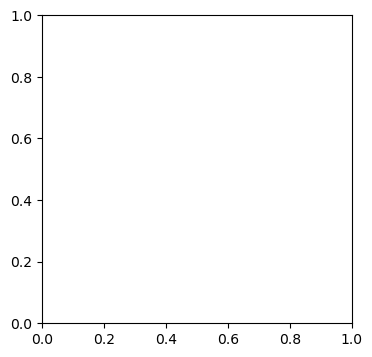

In [81]:
fig, ax = plt.subplots(figsize=(4, 4))

In [82]:
ax.plot(plot_data["groups"], plot_data["vars"])

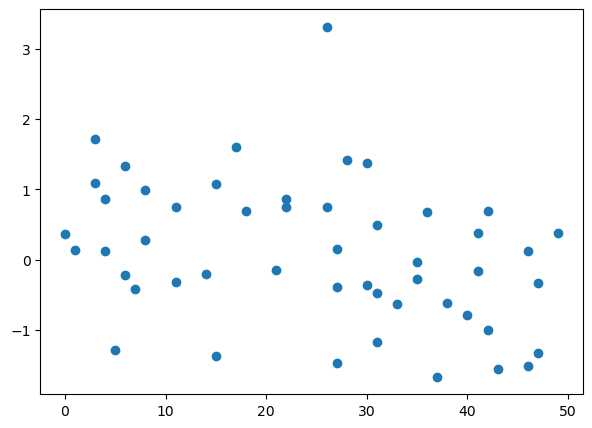

In [83]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(plot_data["counts"], plot_data["vars"])
plt.show()

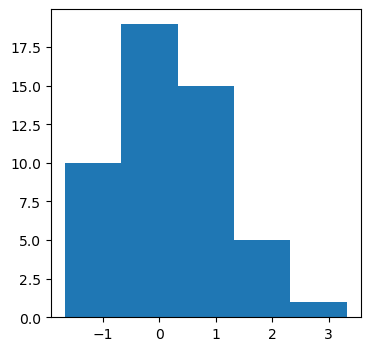

In [84]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(plot_data["vars"], bins=5)
plt.show()

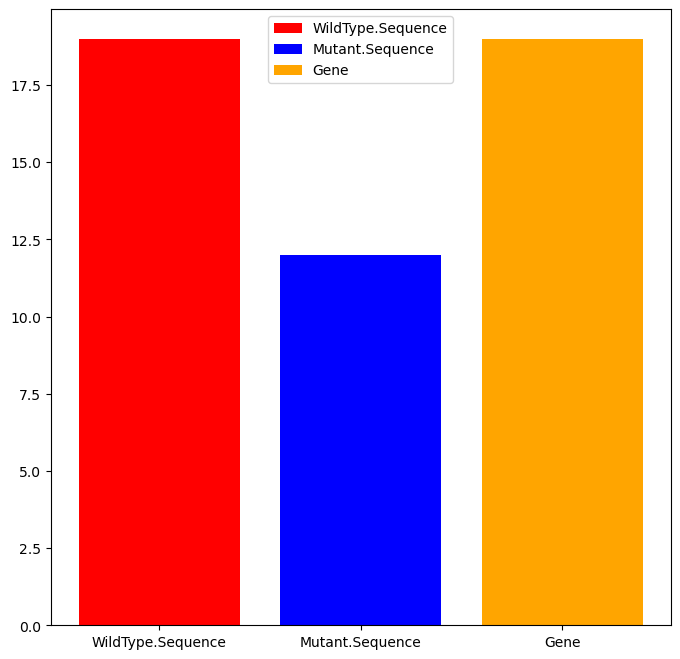

In [87]:
bar_data = {}
group_data = plot_data["groups"]

for val in set(group_data): # set() gives the unique values
    val_list = [x for x in plot_data["groups"] if x == val]
    bar_data[val] = len(val_list)

    
fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(bar_data.keys(), bar_data.values(),
       color=['red', 'blue', 'orange'],
       label=bar_data.keys())
ax.legend()
plt.show()

In [90]:
import seaborn as sbn
import pandas as pd

In [92]:
plot_df = pd.DataFrame(plot_data) 
plot_df.head()

,groups,vars,counts
0,Gene,-1.560352,43
1,Mutant.Sequence,-0.030978,35
2,WildType.Sequence,-0.620928,38
3,WildType.Sequence,-1.464580,27
4,Gene,1.411946,28


<Axes: xlabel='groups', ylabel='vars'>

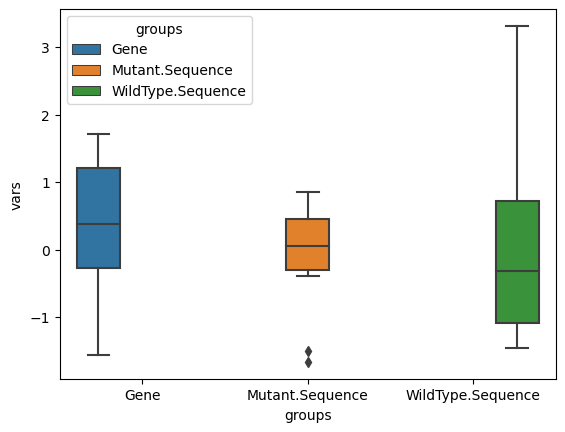

In [93]:
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups")

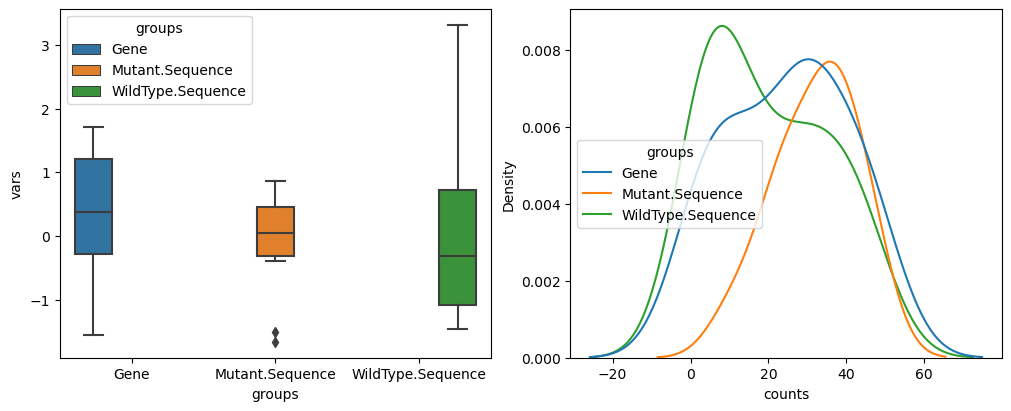

In [97]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), layout="constrained")
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups", ax=ax[0])
sbn.kdeplot(plot_df, x="counts", hue="groups", ax=ax[1])
plt.show()